<a href="https://colab.research.google.com/github/anahimaciel/Networks-in-cities/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy.distance

import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#read df
city="Caucaia"
residence_df = pd.read_csv("/content/drive/MyDrive/Networks in cities/Dados/"+city+"/home_locations.txt")
residence_df=residence_df.drop(residence_df.columns[0],axis=1)
residence_df

user_from  antenna  date  time  user_to  \
0       00008112363605FFC0A6971A16D98128     3823     1     1        1   
1       0000851C574768CA2BB1156851A3171C     3872     1     1        1   
2       0000F8778334D32580C06AF4C176E162     3191     1     1        1   
3       00018C8646F523A687A8387E76A47295     1601     1     1        1   
4       00018D858C1D7803B20F7B0DF28E9211     1102     1     1        1   
...                                  ...      ...   ...   ...      ...   
307400  FFFF6761884073022FB5DFE1B6F54DE3      892     1     1        1   
307401  FFFF73B828960B2C39C560BBA1B93B4C     2422     1     3        2   
307402  FFFFBBF11C6DCD793A020564A9CF6FFE      893     1     1        1   
307403  FFFFC5D625F2527647BD4D859AB95B37     3191     1     4        2   
307404  FFFFDD9F1B5D2FA8F59163E0ED00B169     1103     1     1        1   

        day_week  UF  DDD      LAT      LONG     CITY  \
0              1  CE   85 -3.76556 -38.65028  Caucaia   
1              1  CE   85 -3.67389 -38.67167  Caucaia   
2              1  CE   85 -3.73389 -38.65722  Caucaia   
3              1  CE   85 -3.74214 -38.61220  Caucaia   
4              1  CE   85 -3.76810 -38.61820  Caucaia   
...          ...  ..  ...      ...       ...      ...   
307400         1  CE   85 -3.73960 -38.65510  Caucaia   
307401         1  CE   85 -3.77722 -38.62194  Caucaia   
307402         1  CE   85 -3.73960 -38.65510  Caucaia   
307403         1  CE   85 -3.73389 -38.65722  Caucaia   
307404         1  CE   85 -3.76810 -38.61820  Caucaia   

                     MUNICIPALITY  
0       Microrregião de Fortaleza  
1       Microrregião de Fortaleza  
2       Microrregião de Fortaleza  
3       Microrregião de Fortaleza  
4       Microrregião de Fortaleza  
...                           ...  
307400  Microrregião de Fortaleza  
307401  Microrregião de Fortaleza  
307402  Microrregião de Fortaleza  
307403  Microrregião de Fortaleza  
307404  Microrregião de Fortaleza  

[307405 rows x 12 columns]

In [ ]:
#calculate number of people living in certain area
loc_pop = residence_df.groupby('antenna').size().to_frame(name="loc_pop")
residence_df=pd.merge(residence_df,loc_pop,on="antenna",how="left")

# Home Location

In [ ]:
#create interactive map of residences
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(residence_df,
                        lat="LAT",
                        lon="LONG",
                        color="loc_pop",
                        color_continuous_scale=color_scale,
                        size="loc_pop",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<ipython-input-21-e5332b231a9c>:7: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



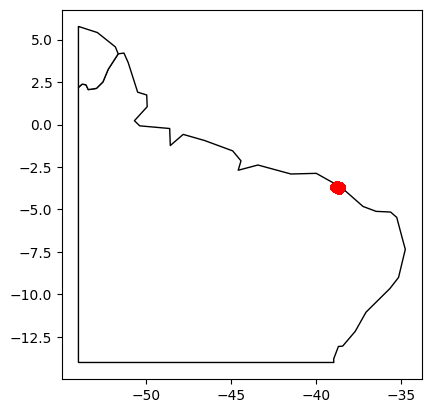

In [ ]:
#create geodataframe
gdf = gpd.GeoDataFrame(
    residence_df, geometry=gpd.points_from_xy(residence_df.LONG, residence_df.LAT), crs="EPSG:4326"
)

#world map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

#restricting world to Brazil
#ax = world.clip([-74, -34, -35, 6]).plot(color="white", edgecolor="black")
ax = world.clip([-54, -14, -15, 6]).plot(color="white", edgecolor="black")            #better to restrict to limits of city

#plot geodataframe with matplotlib
gdf.plot(ax=ax, color="red")

plt.show()